In [1]:
import fsc
from fsc.devices import w7x

In [2]:
fsc.resolve.importOfflineData("C:\\Users\\Knieps\\Downloads\\w7x.fsc")

In [3]:
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32
grid

(rMin = 4, rMax = 7, zMin = -1.5, zMax = 1.5, nSym = 5, nR = 128, nZ = 128, nPhi = 32)

In [4]:
tracer = fsc.tracer()
help(tracer)

Help on FLT in module fsc.flt object:

class FLT(builtins.object)
 |  FLT(backend)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, backend)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  computeField(self, *args, **kwargs)
 |      return self.computeFieldAsync(*args, **kwargs).wait()
 |  
 |  computeFieldAsync(self, config, grid)
 |      Returns an array of shape [3, grid.nPhi, grid.nZ, grid.nR] containing the magnetic field.
 |      The directions along the first coordinate are phi, z, r
 |  
 |  poincareInPhiPlanes(self, *args, **kwargs)
 |      return self.poincareInPhiPlanesAsync(*args, **kwargs).wait()
 |  
 |  poincareInPhiPlanesAsync(self, points, phiValues, nTurns, config, grid, distanceLimit=10000.0, stepSize=0.001)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of 

In [6]:
cadCoils = w7x.computeCoilFields(tracer.calculator, wb7x.cadCoils(), grid = grid)

Main 0
Main 1
Main 2
Main 3
Main 4
Main 5
Main 6
Trim 0
Trim 1


RuntimeError: C++ exception (failed) at c++\python\async.cpp -- line 243
Traceback (most recent call last):

  File "c:\users\knieps\documents\repos\fsc\src\python\fsc\devices\w7x\__init__.py", line 52, in computeCoilFields
    fields.trimFields[i].computedField = await resolveAndCompute(fields.trimFields[i])

  File "c:\users\knieps\documents\repos\fsc\src\python\fsc\devices\w7x\__init__.py", line 41, in resolveAndCompute
    x = (await calculator.compute(x, grid)).computedField

KeyboardInterrupt


Trace: 


In [6]:
fsc.data.writeArchive(cadCoils, "cadCoils.fsc").wait()

In [5]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc").wait()

In [6]:
config = w7x.standard(coils = archiveCoils)

In [15]:
config.ptree()

┐
└── w7xMagneticConfig
    └── coilsAndCurrents
        ├── nonplanar
        │   ├── 0: 15000.0
        │   ├── 1: 15000.0
        │   ├── 2: 15000.0
        │   ├── 3: 15000.0
        │   └── 4: 15000.0
        ├── planar
        │   ├── 0: 0.0
        │   └── 1: 0.0
        ├── trim
        │   ├── 0: 0.0
        │   ├── 1: 0.0
        │   ├── 2: 0.0
        │   ├── 3: 0.0
        │   └── 4: 0.0
        ├── control
        │   ├── 0: 0.0
        │   └── 1: 0.0
        └── coils
            └── fields
                ├── mainFields
                │   ├── 0
                │   │   └── computedField
                │   │       ├── grid
                │   │       │   ├── rMin: 4.0
                │   │       │   ├── rMax: 7.0
                │   │       │   ├── zMin: -1.5
                │   │       │   ├── zMax: 1.5
                │   │       │   ├── nSym: 5
                │   │       │   ├── nR: 128
                │   │       │   ├── nZ: 128
                │   │       │   └── n

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
bPhi, bZ, bR = tracer.computeField(config, grid)

Grid: (rMin = 4, rMax = 7, zMin = -1.5, zMax = 1.5, nSym = 5, nR = 128, nZ = 128, nPhi = 32)


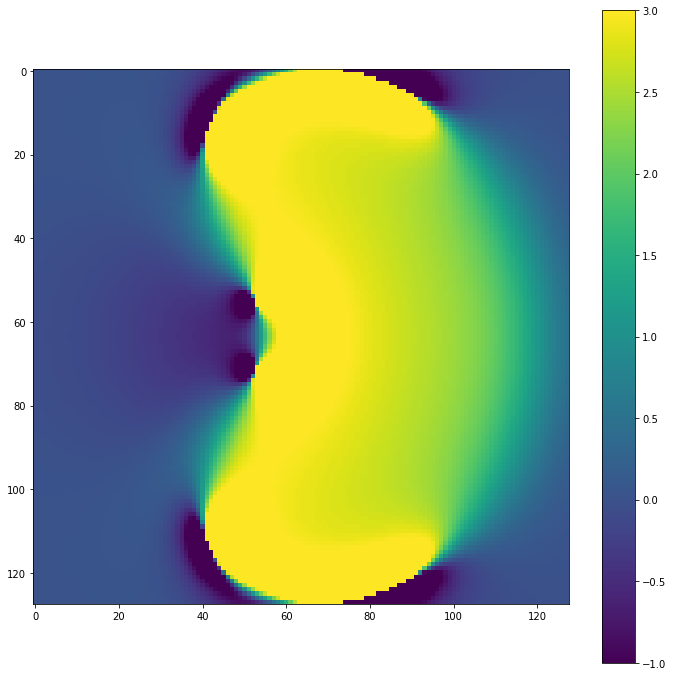

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(bPhi[0], vmin = -1, vmax = 3)
plt.colorbar()

In [9]:
points = np.linspace([5.6, 0.0, 0.0], [6.0, 0, 0], 10, axis = 1)
print(points)
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 2000, config, grid, distanceLimit = 5e4, stepSize = 1e-3)

[[5.6        5.64444444 5.68888889 5.73333333 5.77777778 5.82222222
  5.86666667 5.91111111 5.95555556 6.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


In [10]:
pcPoints.shape

(3, 1, 10, 1379)

(0.0, 0.2)

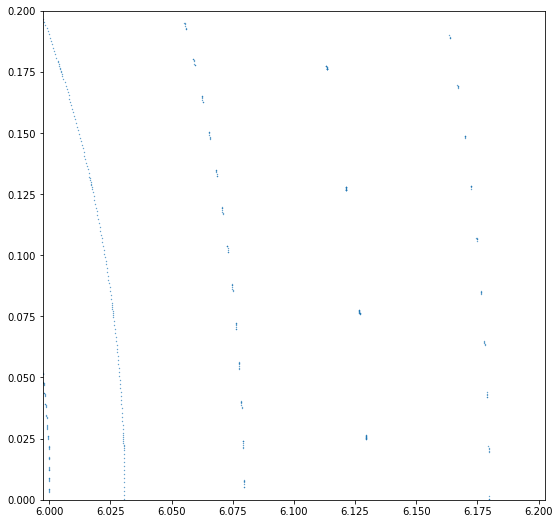

In [13]:
plt.figure(figsize=(9,9))
x, y, z = pcPoints.reshape([3, -1])[:,:]
plt.scatter(x, z, s = 0.1)
plt.axis('equal')
plt.xlim(6.0, 6.2)
plt.ylim(0.0, 0.2)

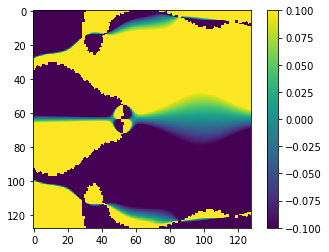

In [15]:
plt.imshow((bR / bPhi)[0], vmin = -0.1, vmax = 0.1)
plt.colorbar()

In [13]:
0.5**2 + 0.8**2 + 0.3**2

0.9800000000000001